# Stackoverflow Developers Survey 2019

**Source:** https://insights.stackoverflow.com/survey/2019

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
pd.options.display.max_columns=999
pd.options.display.max_rows=999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
%ls developer_survey_2019/

README_2019.txt            survey_results_public.csv
so_survey_2019.pdf         survey_results_schema.csv


In [3]:
df = pd.read_csv('developer_survey_2019/survey_results_public.csv')
print(df.shape)
df.head()

(88883, 85)


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [4]:
df.Respondent.nunique() == df.shape[0]

True

In [15]:
def expand_cols(series, sep=';'):
    """
    Splits multiple answers the values into multiple columns 
    """
    _df = series.str.split(sep, expand=True)
    dim = _df.shape[1]
    unique_vals = [v for v in pd.unique(_df.values.ravel()) if pd.notnull(v)]
    
    for val in unique_vals:
        _df.loc[:,val] = _df.iloc[:,:dim].apply(lambda row: 1 if val in set(row) else 0, axis=1)
    
    _df = _df.iloc[:,dim:]
    return _df.sum().sort_values(ascending=False)


def make_barplot(_series, tit, horizontal=False):
    """
    Plots the series item-frequency from the function 'expand_cols'.
    Applies some formatting to the plot.
    """
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(15,4))
    
    if horizontal:
        p = sns.barplot((_series/_series.sum())*100, _series.index, palette="Blues_d")
        plt.xticks(fontsize=11.5)
        plt.xlabel('Frequency (%)')

    else:
        p = sns.barplot(_series.index, (_series/_series.sum())*100, palette="Blues_d")
        plt.xticks(rotation=45, horizontalalignment="right", fontsize=11.5)
        plt.ylabel('Frequency (%)')
    
    for sp in ['right', 'left', 'top']:
        ax.spines[sp].set_visible(False)

    plt.title(tit, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(tit+'.png', dpi=150)
    plt.show()

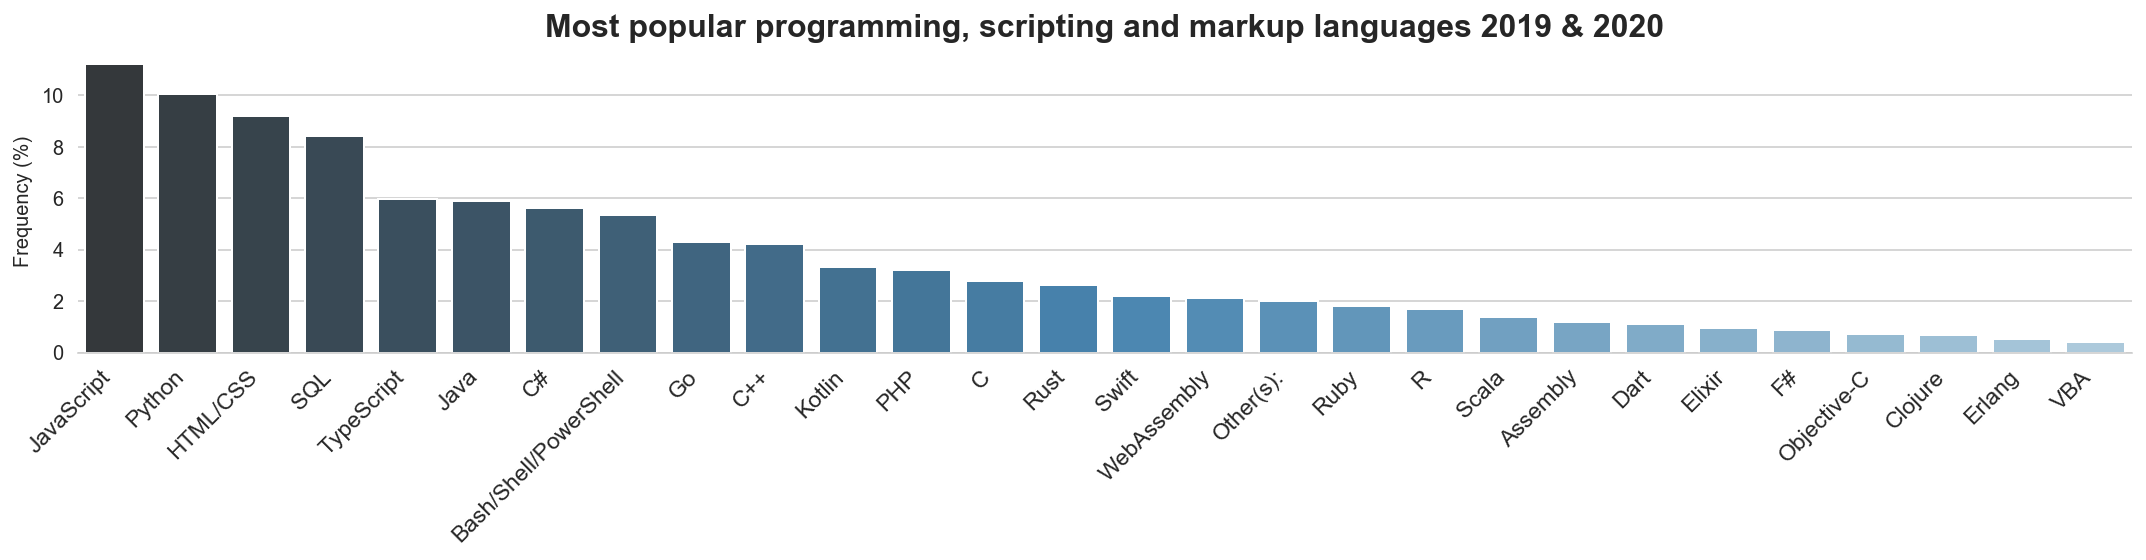

In [16]:
## QUESTION:
# Which of the following programming, scripting, and markup languages have you
# done extensive development work in over the past year, and which do you want
# to work in over the next year?  (If you both worked with the language and want
# to continue to do so, please check both boxes in that row.)

langn = expand_cols(df.LanguageDesireNextYear)
make_barplot(langn, 'Most popular programming, scripting and markup languages 2019 & 2020')

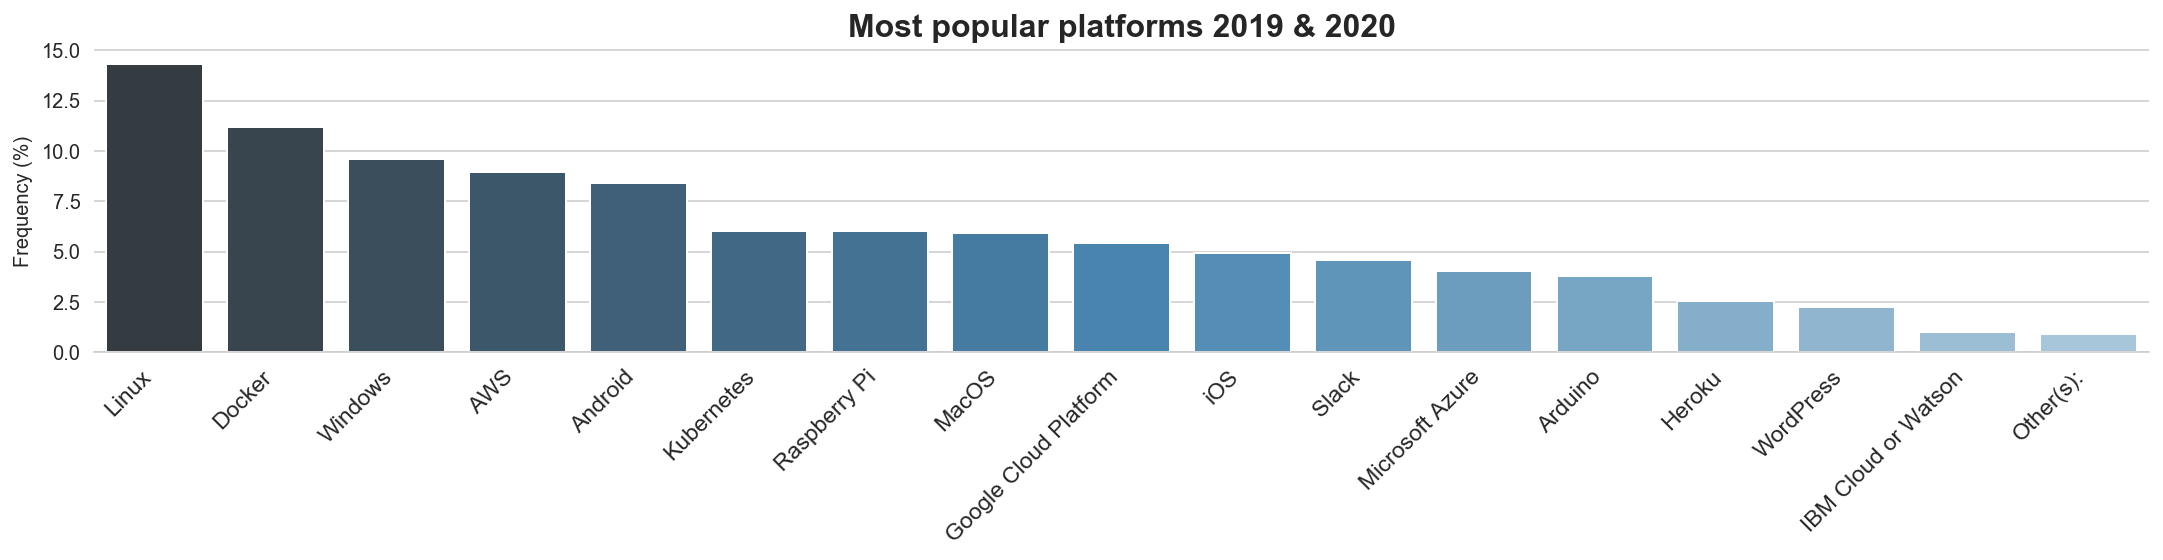

In [17]:
## QUESTION:
# Which of the following platforms have you done extensive development work for
# over the past year?   (If you both developed for the platform and want to
# continue to do so, please check both boxes in that row.)

platn = expand_cols(df.PlatformDesireNextYear)
make_barplot(platn, 'Most popular platforms 2019 & 2020')

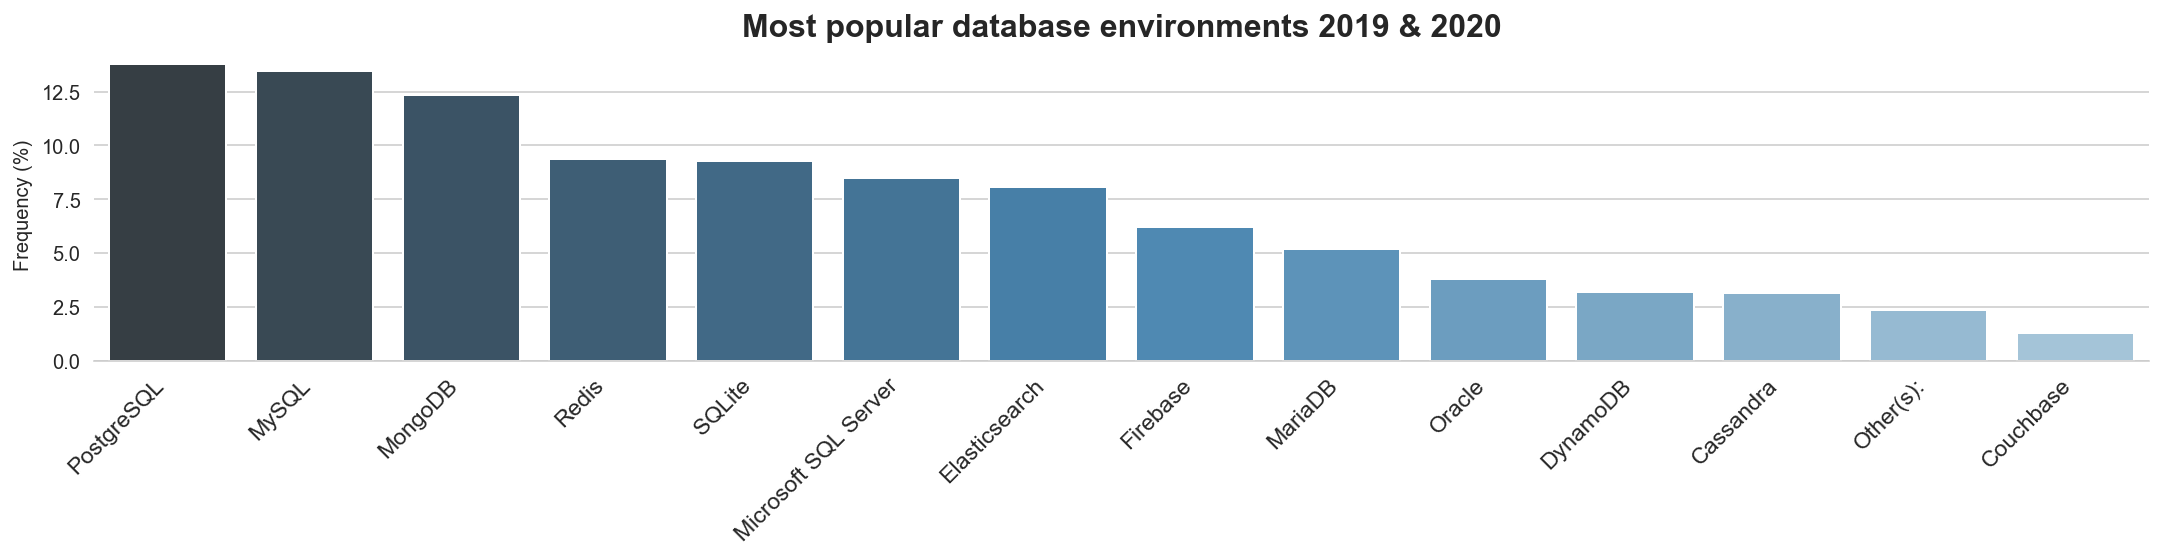

In [18]:
## QUESTION:
# Which of the following database environments have you done extensive
# development work in over the past year, and which do you want to work in over
# the next year?   (If you both worked with the database and want to continue
# to do so, please check both boxes in that row.)

dbn = expand_cols(df.DatabaseDesireNextYear)
make_barplot(dbn, 'Most popular database environments 2019 & 2020')

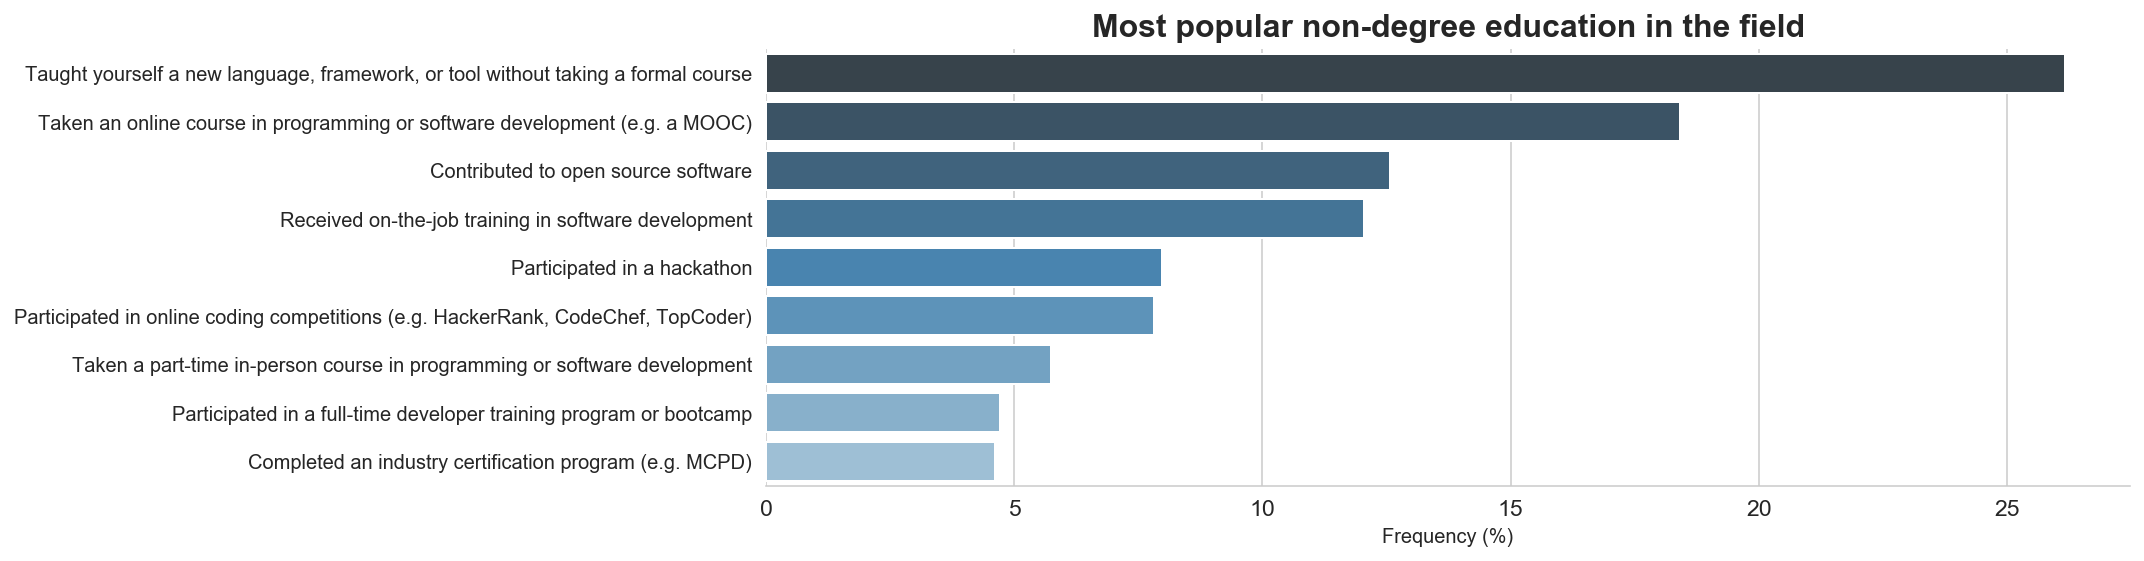

In [19]:
## QUESTION:
# Which of the following types of non-degree education have you used or
# participated in? Please select all that apply.

eduo = expand_cols(df.EduOther)
make_barplot(eduo, 'Most popular non-degree education in the field', True)

In [ ]:
workc = expand_cols(df.WorkChallenge)
workc.sum().sort_values().plot(kind='barh')

In [ ]:
dev = expand_cols(df.DevType)
dev.sum().sort_values().plot(kind='barh')

In [ ]:
#sns.set_style('white')
make_barplot(langn, 'Most popular programming, scripting and markup languages 2019 & 2020')

In [ ]:
make_barplot(langn, 'Most popular programming, scripting and markup languages 2019 & 2020', True)

In [ ]:
edul = expand_cols(df.EdLevel)
edul.sum().sort_values().plot(kind='barh')

In [ ]:
imps = expand_cols(df.ImpSyn)
imps.sum().sort_values().plot(kind='barh')

In [ ]:
env = expand_cols(df.DevEnviron)
env.sum().sort_values().plot(kind='barh')

In [ ]:
(env.mean()*100).sort_values().plot(kind='barh')

In [ ]:
df.Country.value_counts()
df.WorkChallenge.value_counts() # expand
df.DevEnviron.value_counts() # expand
df.LanguageDesireNextYear.value_counts() # expand
df.PlatformDesireNextYear.value_counts() # expand
df.DatabaseDesireNextYear.value_counts() # expand .str.split(';', expand=True).head()

df.DevType.str.split(';', expand=True).nunique()
df.ImpSyn.value_counts()
df.JobSat.value_counts()
df.EdLevel.value_counts()
df.EduOther.str.split(';', expand=True).nunique()

df.CompTotal.value_counts()

In [ ]:
plt.figure(figsize=(30,1))
sns.boxplot(x=df[df.CompTotal < 1000000].CompTotal)

In [ ]:
df[df.CompTotal < 1000000].CompTotal.describe()

In [ ]:
df[df.CompTotal < 500000].CompTotal